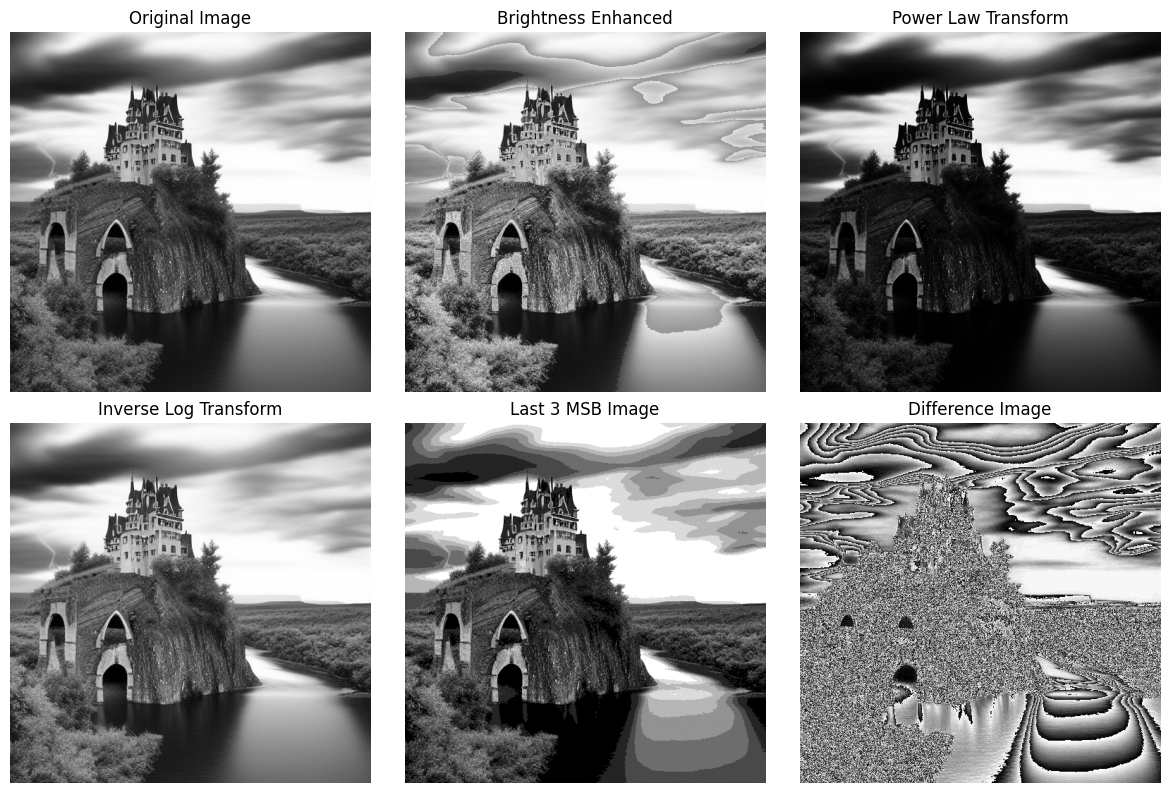

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread("img1.jpg", cv2.IMREAD_GRAYSCALE)

if image is None:
    raise FileNotFoundError("Image not found. Please provide a valid 512x512 grayscale image.")

# Ensure the image is 512x512
image = cv2.resize(image, (512, 512))

# (a) Perform brightness enhancement on a specific range of gray levels
def enhance_brightness(image, lower_bound, upper_bound, enhancement_factor):
    enhanced_image = image.copy()
    mask = (image >= lower_bound) & (image <= upper_bound)
    enhanced_image[mask] = np.clip(image[mask] * enhancement_factor, 0, 255).astype(np.uint8)
    return enhanced_image

# Brightness enhancement parameters
lower_bound = 50
upper_bound = 150
enhancement_factor = 1.5

brightness_enhanced_image = enhance_brightness(image, lower_bound, upper_bound, enhancement_factor)

# (b) Power law and inverse logarithmic transformations
def power_law_transform(image, gamma):
    normalized_image = image / 255.0
    transformed_image = np.power(normalized_image, gamma)
    return (transformed_image * 255).astype(np.uint8)

def inverse_log_transform(image):
    normalized_image = image / 255.0
    transformed_image = np.log1p(normalized_image) / np.log(2)
    return (transformed_image * 255).astype(np.uint8)

# Transformation parameters
gamma = 2.0
power_law_image = power_law_transform(image, gamma)
inverse_log_image = inverse_log_transform(image)

# Difference image between the original and the image obtained by the last three MSB
def extract_msb(image, bits):
    shift_amount = 8 - bits
    return (image >> shift_amount) << shift_amount

msb_image = extract_msb(image, 3)
difference_image = cv2.absdiff(image, msb_image)

# Display the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.title("Brightness Enhanced")
plt.imshow(brightness_enhanced_image, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.title("Power Law Transform")
plt.imshow(power_law_image, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.title("Inverse Log Transform")
plt.imshow(inverse_log_image, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.title("Last 3 MSB Image")
plt.imshow(msb_image, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.title("Difference Image")
plt.imshow(difference_image, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()
